# 1. Training a pixelclassifier 
To analyse how cells are separated, you must first define what is a cell — and what is a gap between cells.  
To do this, we classify pixels — i.e. give each pixel a label with regards to whether it belongs to a cell, gap, or background.  

In QuPath, we can train a pixelclassifier that does this assignment for us 

## Option A: Applying an existing pixelclassifier 
We trained a pixelclassifier (```tissue_background.json```) to segment foreground tissue. 
Download the classifier from the ```pixel_classifiers``` folder in GitHub and place it your QuPath project folder under ```classifiers/pixel_classifiers/```
Then skip to point 1.4 

## Option B: Create your own pixelclassifier 
## 1.1 Create necessary classes 
Check all necessary classes for segmentation are in QuPath. Add missing classes: 

Open the `Annotations` tab, click on the three vertical buttons to the right of "Set selected" and "Auto set", and click on `Add/Remove... > Add class`  
Type the name of the class (e.g. "gap") and click OK. Repeat this for all relevant classes. 

## 1.2 Creating a training image to classify tissue and background
To train a pixel classifier on multiple images, you can [create a composite training image](https://qupath.readthedocs.io/en/stable/docs/tutorials/pixel_classification.html#create-a-training-image). 
To separate images into tissue and background, we are going to use a simple thresholder.

Use few, but large, and representative patches to generate a composite image for a thresholder. (See info box below)
1. For instance, use ```Classify ‣ Training images ‣ Create region annotations``` to select a 10000 x 10000 px region in each of the two images and clicked ```Create region``` until a region that covered mostly tissue and a little background was selected (see screenshot).  
2. Manually deleted all other regions.  
3. Save changes and generate a training image using ```Classify ‣ Training images ‣ Create training image```

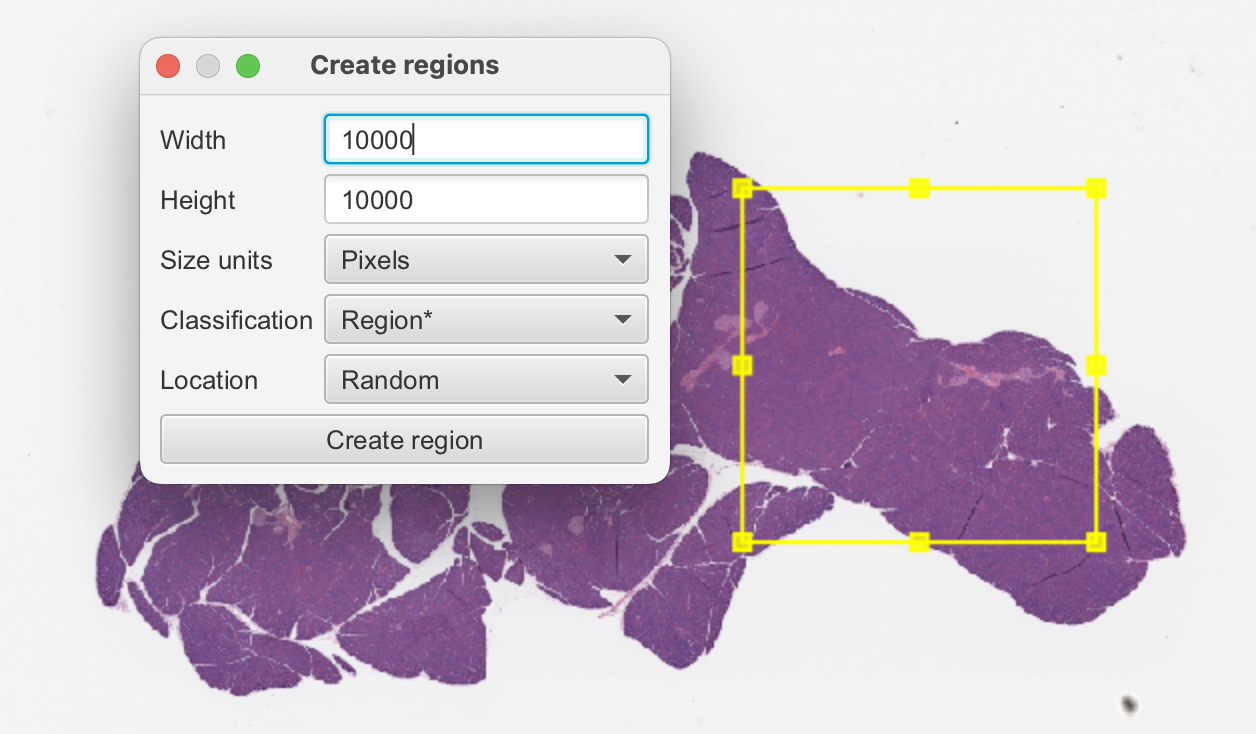

>Note: How to create a training image?  
>A thresholder requires visual inspection only and no manual annotation. 
>Later in this tutorial, we are going to train a random forest based pixel classifier to classify the gaps between cells.   
>A random forrest based pixel classifier needs manual annotation of training data. 
>For a thresholder, representative patches thus 
>* Allow tuning a thresholder via visual inspection of the results 
>* And are therefore large enough to provide sufficient visual context 
>* The total area of the generated training image is limited by computational speed 
>* Yet, they should be representative of the variation within the dataset 
>* And selected in a manner to reduce bias. 

## 1.3 Classify tissue and background 
Follow [this](https://qupath.readthedocs.io/en/stable/docs/tutorials/thresholding.html#detecting-tissue) tutorial.  
Important: Make sure gaps between cells are not classified as background — for instance by setting a smoothing sigma.  
Below are the settings used for this tutorial, but you may find different settings work better for your data.  
Name the classifier "tissue_background" and save it by clicking "save".  


>Note: We used a more complex approach for the publication. To analyse necrotic cells of the exocrine tissue, we specifically segmented exocrine tissue — a more difficult task than segmenting any tissue.  
>We reused these segments to analyse gaps between cells. However the analysis of cell-isolation is more robust than the inclusion of non-exocrine tissue, allowing for a simpler and faster thresholding-based segmentation.  

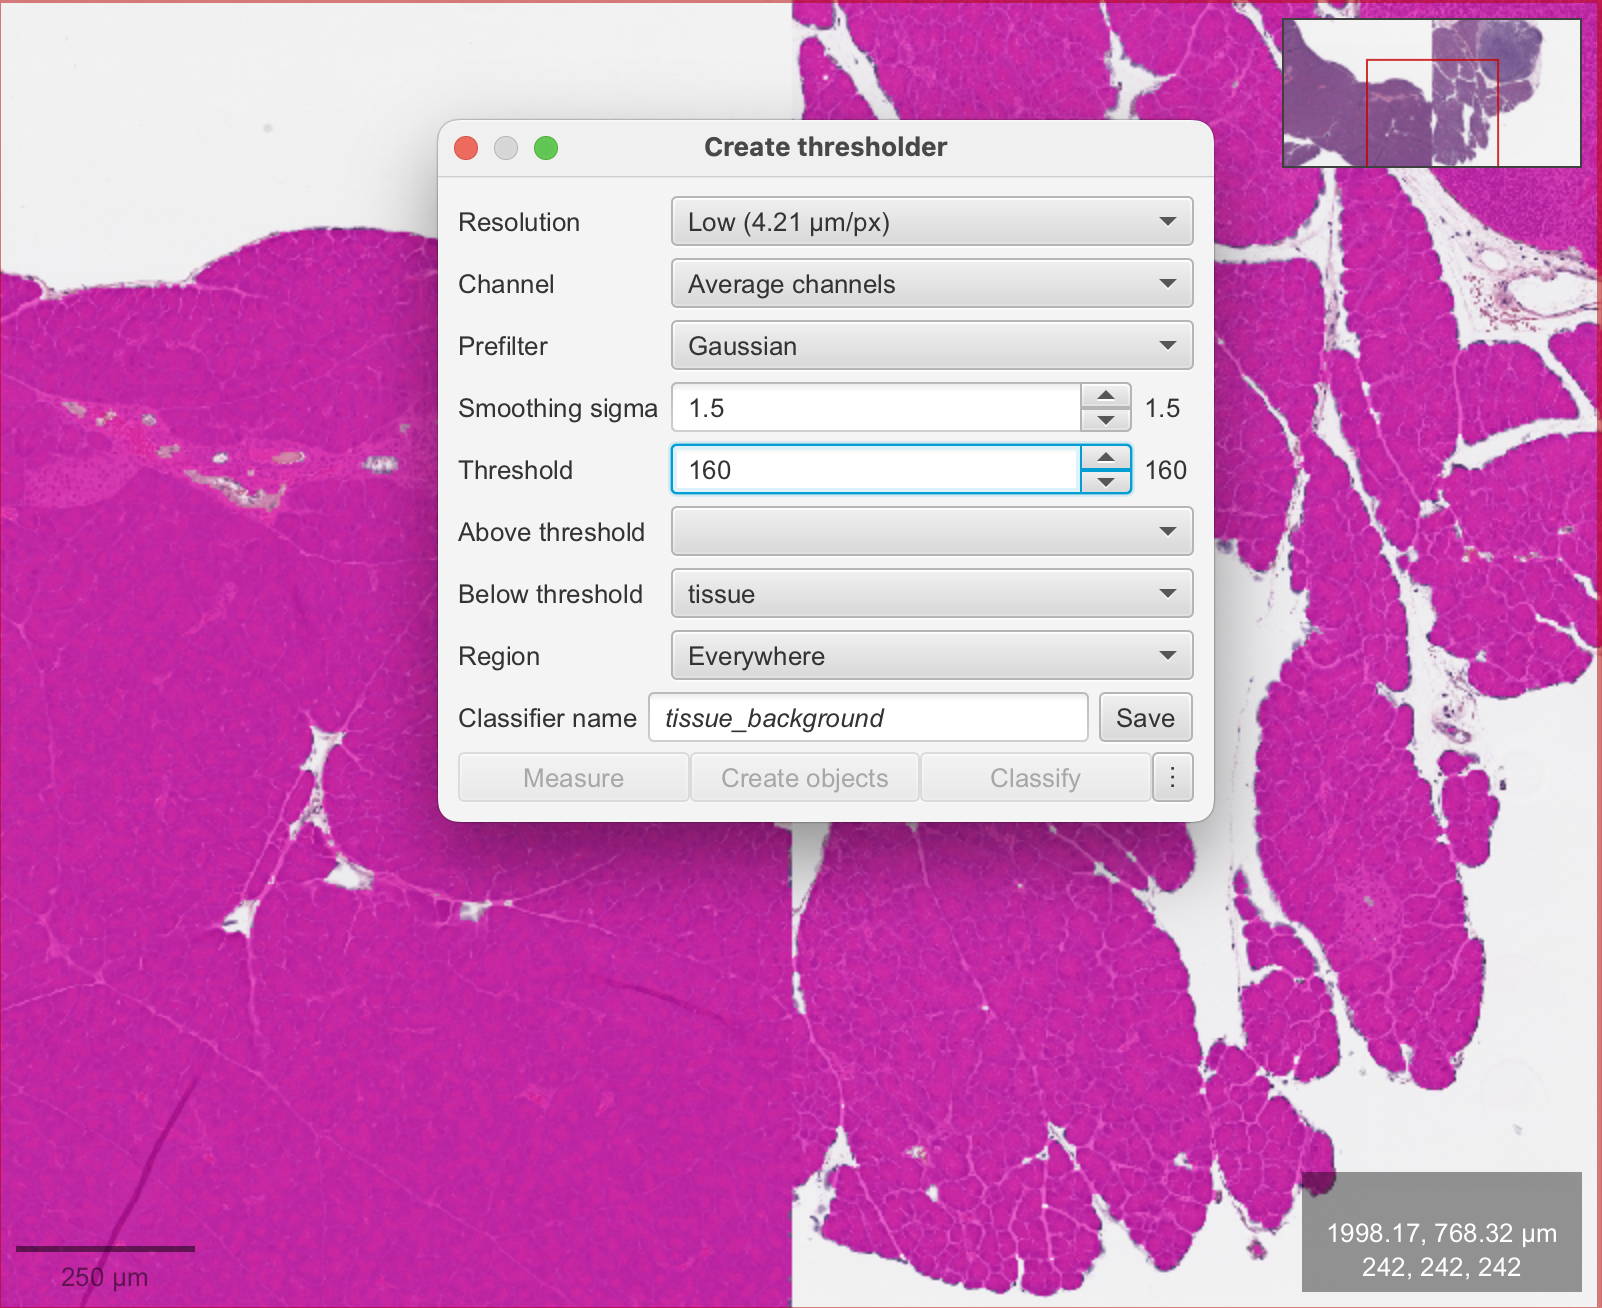

## 1.4 Apply the classifier to all images
Apply this classifier to all images in your project by running the Groovy script below for all images.  
The first argument passed to ```createAnnotationsFromPixelClassifier()``` is the name of the classifier.  
The second is the minimum area of a region to keep.  Smaller fragments will be discarded.  
The third is the minimum hole area. Holes smaller than this area will be filled. 
To get a feeling for sizes and the unit, you can [draw an annotation](https://qupath.readthedocs.io/en/stable/docs/starting/annotating.html) and check its measurements in the ```Measurements``` tab under ```Annotations```. 

In [ ]:
setImageType('BRIGHTFIELD_H_E');

createAnnotationsFromPixelClassifier("tissue_background", 15000.0, 1500.0) // Units in the example images are um^2 